In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt


In [2]:
alcohol_df = pd.read_csv('Alcohol.csv')

In [3]:
alcohol_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question',
       'DataValue', 'DataValueUnit', 'DataValueType', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1'],
      dtype='object')

In [4]:
alcohol_df['DataValueUnit'].value_counts()

DataValueUnit
%                    20652
Number               12177
cases per 100,000     6060
$                      738
gallons                312
Name: count, dtype: int64

In [5]:
alcohol_df['Question'].value_counts()


Question
Chronic liver disease mortality                                           9090
Binge drinking prevalence among adults aged >= 18 years                   8084
Heavy drinking among adults aged >= 18 years                              6176
Binge drinking frequency among adults aged >= 18 years who binge drink    6128
Binge drinking intensity among adults aged >= 18 years who binge drink    6049
Binge drinking prevalence among women aged 18-44 years                    1814
Alcohol use before pregnancy                                              1602
Heavy drinking among women aged 18-44 years                               1299
Alcohol use among youth                                                   1061
Binge drinking prevalence among youth                                      616
Per capita alcohol consumption among persons aged >= 14 years              312
Amount of alcohol excise tax by beverage type (beer)                       300
Amount of alcohol excise tax by beverage ty

In [6]:
alcohol_df['LocationAbbr'].value_counts()

LocationAbbr
NY    1068
CA    1038
WA     989
HI     976
TX     942
MA     937
MI     925
MN     924
IL     920
MD     918
OK     894
NJ     894
VA     894
NM     893
FL     886
PA     885
NC     883
CT     877
CO     870
AZ     864
KS     859
GA     851
NE     840
OH     822
AK     815
SC     805
IN     803
MO     803
LA     787
WI     786
UT     780
MT     771
NV     771
OR     770
RI     751
DC     751
AL     742
DE     738
SD     738
KY     733
AR     725
MS     722
TN     717
IA     703
ND     691
WY     644
VT     639
ME     634
NH     626
ID     625
WV     607
GU     506
US     447
PR     424
VI      66
Name: count, dtype: int64

In [7]:
#This code will show me if the YearStart column and the YearEnd column are all the same or not
same_years = (alcohol_df['YearStart'] == alcohol_df['YearEnd']).all()

if same_years:
    print("The 'YearStart' and 'YearEnd' columns have the same values in all rows.")
else:
    print("The 'YearStart' and 'YearEnd' columns do not have the same values in all rows.")

The 'YearStart' and 'YearEnd' columns have the same values in all rows.


In [8]:
#need to put the YearStart in order
alcohol_df=alcohol_df.sort_values(by='YearEnd')
alcohol_df

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
3206,2010,2010,CO,Alcohol,Chronic liver disease mortality,10.0,"cases per 100,000",Age-adjusted Rate,NaN,9.0,10.9,Race/Ethnicity,"White, non-Hispanic"
8380,2010,2010,OK,Alcohol,Chronic liver disease mortality,85.0,NaN,Number,NaN,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native
4512,2010,2010,CO,Alcohol,Chronic liver disease mortality,8.4,"cases per 100,000",Crude Rate,NaN,7.2,9.5,Gender,Female
4519,2010,2010,KS,Alcohol,Chronic liver disease mortality,7.8,"cases per 100,000",Age-adjusted Rate,NaN,6.8,8.8,Overall,Overall
4520,2010,2010,NM,Alcohol,Chronic liver disease mortality,11.7,"cases per 100,000",Crude Rate,NaN,9.6,13.8,Gender,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33111,2021,2021,NY,Alcohol,Binge drinking frequency among adults aged >= ...,4.4,Number,Age-adjusted Mean,NaN,3.5,5.4,Race/Ethnicity,"Black, non-Hispanic"
13814,2021,2021,AK,Alcohol,Binge drinking intensity among adults aged >= ...,7.4,Number,Age-adjusted Mean,NaN,6.9,7.9,Overall,Overall
13818,2021,2021,AL,Alcohol,Binge drinking frequency among adults aged >= ...,5.0,Number,Mean,NaN,4.1,6.0,Overall,Overall
13774,2021,2021,AK,Alcohol,Heavy drinking among adults aged >= 18 years,9.8,%,Age-adjusted Prevalence,NaN,8.1,11.8,Gender,Female


In [9]:
#This would turn 'YearEnd' into a date time by year but im sure why would need to do this will investigate more
#alcohol_df['YearEnd'] = pd.to_datetime(alcohol_df['YearEnd'], format='%Y')

#This code allows us to display value counts in order by year so we can see the order of years and how many rows of data each year contains
# use this code if you convert to datetime (year_end_counts = alcohol_df['YearEnd'].dt.year.value_counts().sort_index())
year_end_counts = alcohol_df['YearEnd'].value_counts().sort_index()
year_end_counts
#data summary for years: it looks like 2007 could be considered an outlier and possibly unusable for our analysis

YearEnd
2010     844
2011    3500
2012    3789
2013    3939
2014    3606
2015    3990
2016    3776
2017    4353
2018    3811
2019    4515
2020    3983
2021    2863
Name: count, dtype: int64

In [10]:
# chekcing the dtype of the column 'YearEnd', thus far int64 is our goal, but might check again if datetime becomes our targeted dtype
alcohol_df['YearEnd'].dtype


dtype('int64')

In [11]:
#need to explore what kind of data we have in the DataValue comlumn to see what we can compare and use for a graph
#footnotes should give me an idea of what the numbers mean, check against documentation for further understanding
#need to understand if the questions datavalue is infering more or lesslikley hood of chronic desease
#Questions could be something that we could compare, need to check if the datavalues are comparable for all the same Questions
#what will groupby do if i groupby question: desired result it will group all same questions together to have comparable data amongst the same questions
#I might also need to groupby year: desired result all the same question whithin a particular year grouped together so I can show yearly changes with comparable data
#The LocationAbbr includes US, which has to be addressed
#we need to seperate or group by year,question, stratificationCategory1 and then stratification1 if not Overall


alcohol_df


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
3206,2010,2010,CO,Alcohol,Chronic liver disease mortality,10.0,"cases per 100,000",Age-adjusted Rate,NaN,9.0,10.9,Race/Ethnicity,"White, non-Hispanic"
8380,2010,2010,OK,Alcohol,Chronic liver disease mortality,85.0,NaN,Number,NaN,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native
4512,2010,2010,CO,Alcohol,Chronic liver disease mortality,8.4,"cases per 100,000",Crude Rate,NaN,7.2,9.5,Gender,Female
4519,2010,2010,KS,Alcohol,Chronic liver disease mortality,7.8,"cases per 100,000",Age-adjusted Rate,NaN,6.8,8.8,Overall,Overall
4520,2010,2010,NM,Alcohol,Chronic liver disease mortality,11.7,"cases per 100,000",Crude Rate,NaN,9.6,13.8,Gender,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33111,2021,2021,NY,Alcohol,Binge drinking frequency among adults aged >= ...,4.4,Number,Age-adjusted Mean,NaN,3.5,5.4,Race/Ethnicity,"Black, non-Hispanic"
13814,2021,2021,AK,Alcohol,Binge drinking intensity among adults aged >= ...,7.4,Number,Age-adjusted Mean,NaN,6.9,7.9,Overall,Overall
13818,2021,2021,AL,Alcohol,Binge drinking frequency among adults aged >= ...,5.0,Number,Mean,NaN,4.1,6.0,Overall,Overall
13774,2021,2021,AK,Alcohol,Heavy drinking among adults aged >= 18 years,9.8,%,Age-adjusted Prevalence,NaN,8.1,11.8,Gender,Female


In [13]:
smokless_df =alcohol_df.loc[alcohol_df['Question'] == 'Current smokeless alcohol use among adults aged >= 18 years']
smokless_df

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1


In [14]:
#This groups the dataframe first by Year and then question, StratificationCat1, stratification, and finally groups by location
#It then applys a lambda function to make sure the years are in order.
#This currently does not address US in the locations with individual states
grouped_alcohol_df = alcohol_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(
    lambda x: x.sort_values(by = 'YearEnd')).reset_index(drop = True)

grouped_alcohol_df.head()

C:\Users\Adeniyi Lawal\AppData\Local\Temp\ipykernel_101688\1678161883.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_alcohol_df = alcohol_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2010,2010,AK,Alcohol,Chronic liver disease mortality,8.4,"cases per 100,000",Age-adjusted Rate,NaN,5.6,12.1,Gender,Female
1,2010,2010,AK,Alcohol,Chronic liver disease mortality,30.0,NaN,Number,NaN,NaN,NaN,Gender,Female
2,2010,2010,AK,Alcohol,Chronic liver disease mortality,8.8,"cases per 100,000",Crude Rate,NaN,5.9,12.6,Gender,Female
3,2010,2010,AL,Alcohol,Chronic liver disease mortality,160.0,NaN,Number,NaN,NaN,NaN,Gender,Female
4,2010,2010,AL,Alcohol,Chronic liver disease mortality,6.5,"cases per 100,000",Crude Rate,NaN,5.5,7.5,Gender,Female


In [15]:
#use this to look at a list of possible questions to choose from
grouped_alcohol_df['Question'].value_counts()

Question
Chronic liver disease mortality                                           9090
Binge drinking prevalence among adults aged >= 18 years                   8084
Heavy drinking among adults aged >= 18 years                              6176
Binge drinking frequency among adults aged >= 18 years who binge drink    6128
Binge drinking intensity among adults aged >= 18 years who binge drink    6049
Binge drinking prevalence among women aged 18-44 years                    1814
Alcohol use before pregnancy                                              1602
Heavy drinking among women aged 18-44 years                               1299
Alcohol use among youth                                                   1061
Binge drinking prevalence among youth                                      616
Per capita alcohol consumption among persons aged >= 14 years              312
Amount of alcohol excise tax by beverage type (beer)                       300
Amount of alcohol excise tax by beverage ty

In [34]:
#grouped_alcohol_df
questions = grouped_alcohol_df['Question'].unique().tolist()
questions

['Chronic liver disease mortality',
 'Per capita alcohol consumption among persons aged >= 14 years',
 'Alcohol use before pregnancy',
 'Binge drinking frequency among adults aged >= 18 years who binge drink',
 'Binge drinking intensity among adults aged >= 18 years who binge drink',
 'Binge drinking prevalence among adults aged >= 18 years',
 'Binge drinking prevalence among women aged 18-44 years',
 'Heavy drinking among adults aged >= 18 years',
 'Heavy drinking among women aged 18-44 years',
 'Amount of alcohol excise tax by beverage type (beer)',
 'Amount of alcohol excise tax by beverage type (distilled spirits)',
 'Amount of alcohol excise tax by beverage type (wine)',
 'Alcohol use among youth',
 'Binge drinking prevalence among youth']

In [63]:
#The question is can we turn this into a function to apply to other csvs???

#creates a list with all the target valus in the Questions column
questions = grouped_alcohol_df['Question'].unique().tolist()
#creating an empty dictionary to store dataframes with their own unique questions
questions
dfs = {}
#looping through our grouped dataframe to create multiple dataframes containing only one question along with its values and then storing them in a dictionary
# also sets their key values to the target question in their respective dataframes
for question in questions:
    df_name = question
    dfs[df_name] = grouped_alcohol_df.loc[grouped_alcohol_df['Question'] == question]\
        .loc[grouped_alcohol_df['LocationAbbr'] == 'US']\
        .loc[grouped_alcohol_df['StratificationCategory1'] == 'Overall']





In [66]:
grouped_alcohol_df['Question'].unique()

array(['Chronic liver disease mortality',
       'Per capita alcohol consumption among persons aged >= 14 years',
       'Alcohol use before pregnancy',
       'Binge drinking frequency among adults aged >= 18 years who binge drink',
       'Binge drinking intensity among adults aged >= 18 years who binge drink',
       'Binge drinking prevalence among adults aged >= 18 years',
       'Binge drinking prevalence among women aged 18-44 years',
       'Heavy drinking among adults aged >= 18 years',
       'Heavy drinking among women aged 18-44 years',
       'Amount of alcohol excise tax by beverage type (beer)',
       'Amount of alcohol excise tax by beverage type (distilled spirits)',
       'Amount of alcohol excise tax by beverage type (wine)',
       'Alcohol use among youth', 'Binge drinking prevalence among youth'],
      dtype=object)

In [28]:
#dfs[df_name]
#dfs['Current smoking among adults aged >= 18 years']

dfs['Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke']


KeyError: 'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke'

In [45]:
#renaming all the dataframes in the dfs{} and storing them in their respective dataframes
us_overall_Chronic_liver_disease_mortality = dfs['Chronic liver disease mortality']
#us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']
#us_overall_quit_alcohol_df = dfs['Quit attempts in the past year among current smokers']
#us_overall_pneumococcal_vaccination_adult_age18_64_smokers_df =dfs['Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke']
#us_overall_smokeless_alcohol_adult_df = dfs['Current smokeless alcohol use among adults aged >= 18 years']
#us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
#us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
#us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
#us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']
#us_overall_smokeless_youth_df=dfs['Current smokeless alcohol use among youth']
#us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']
#us_overall_sale_cigarette_packs=dfs['Sale of cigarette packs']
#us_overall_2nd_school_alcohol_free_policy=dfs['Secondary schools that have a comprehensive alcohol-free school policy in place']
#us_overall_alcohol_revenue_fund_cdc_level = dfs['Percent alcohol revenue to fund at CDC recommended level']

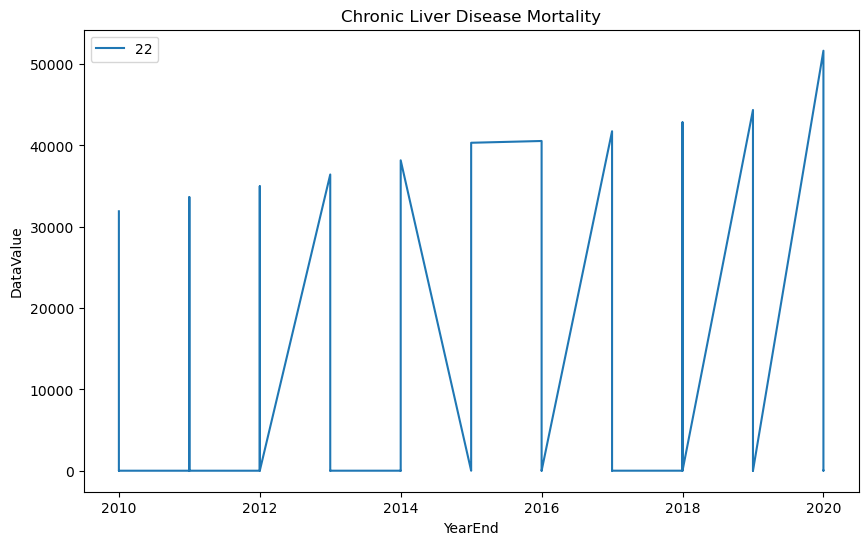

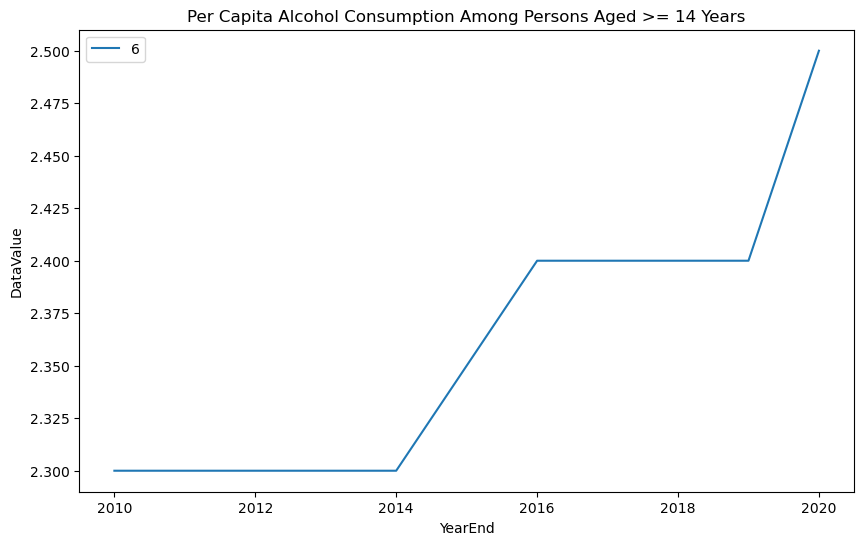

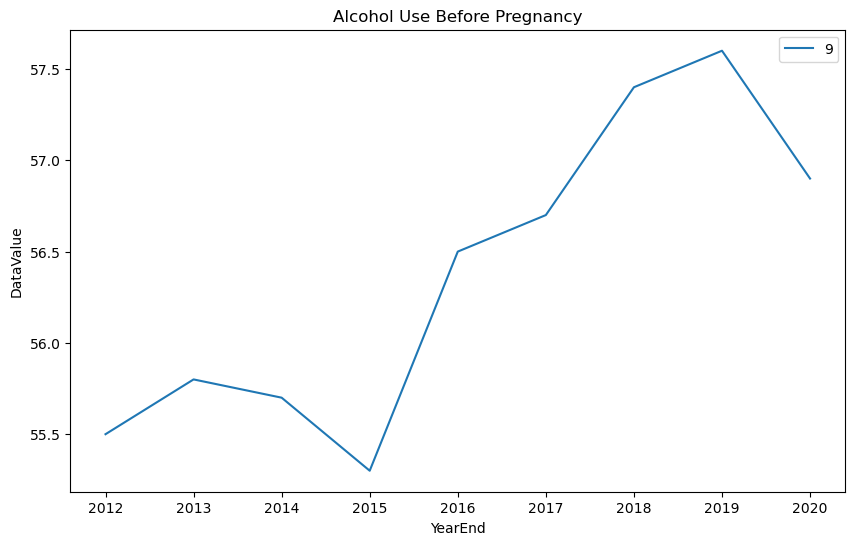

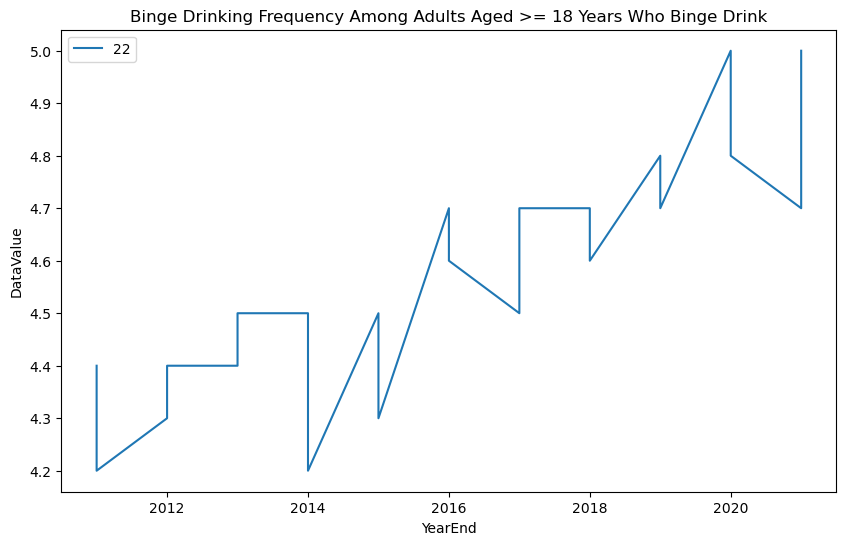

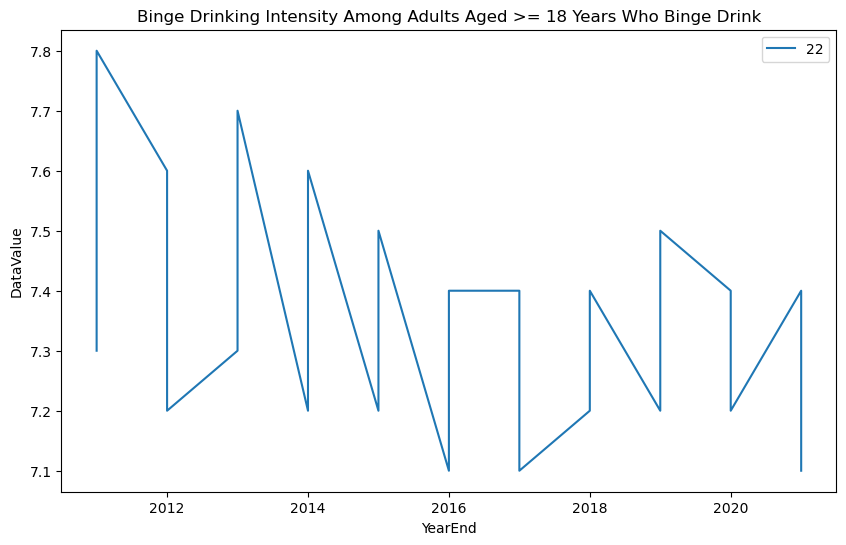

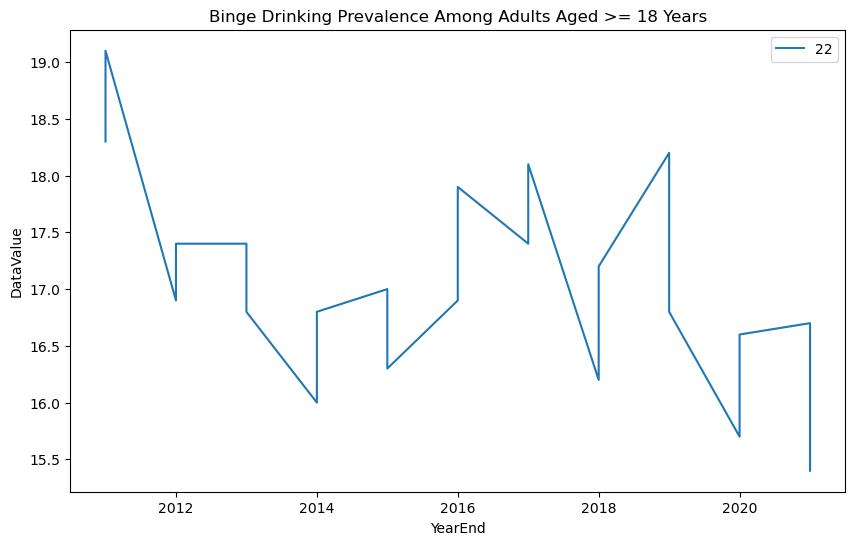

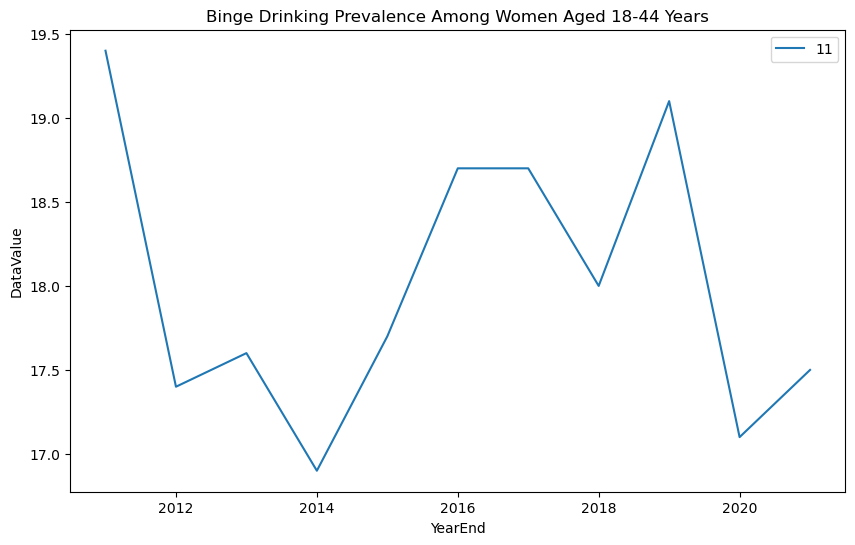

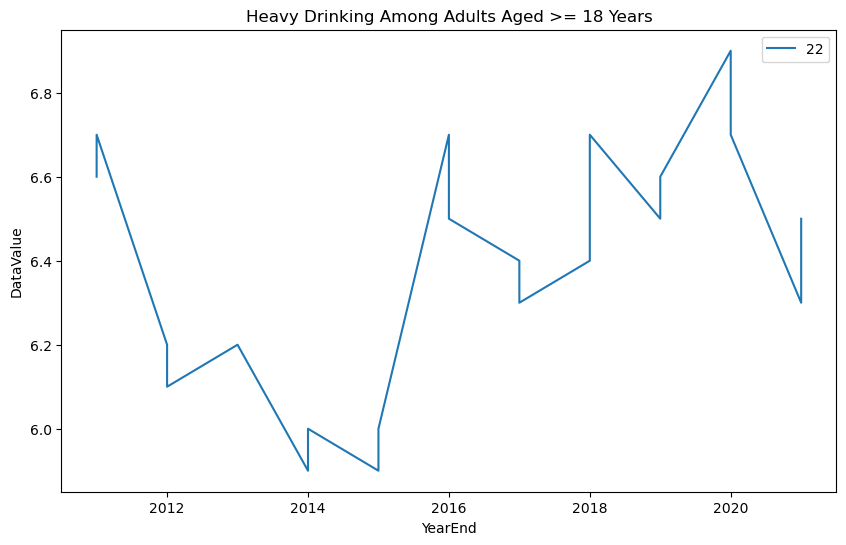

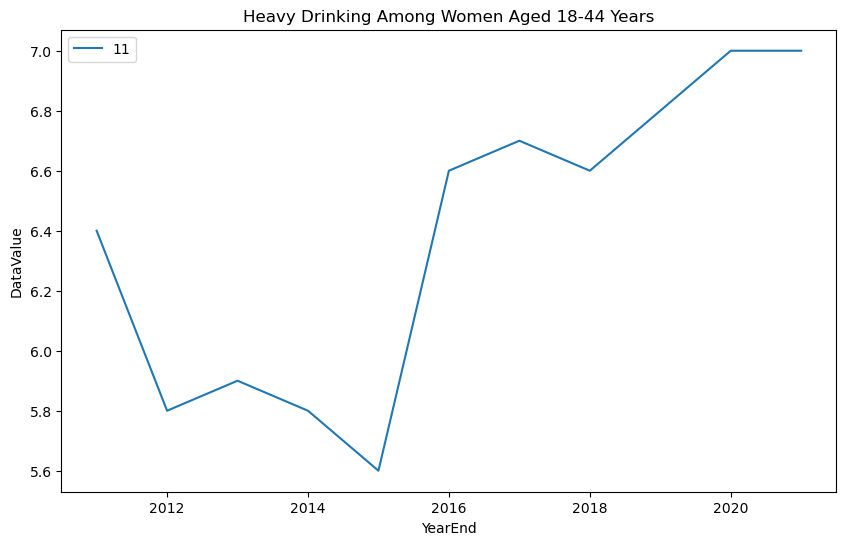

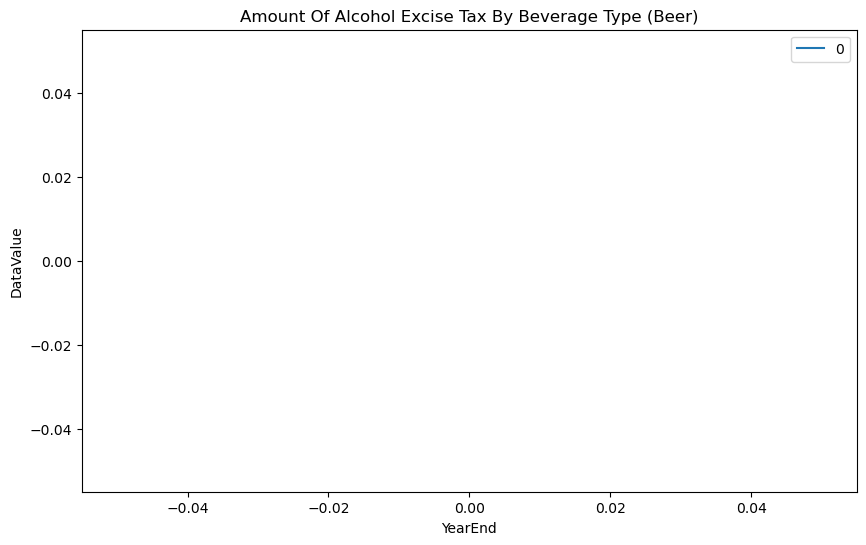

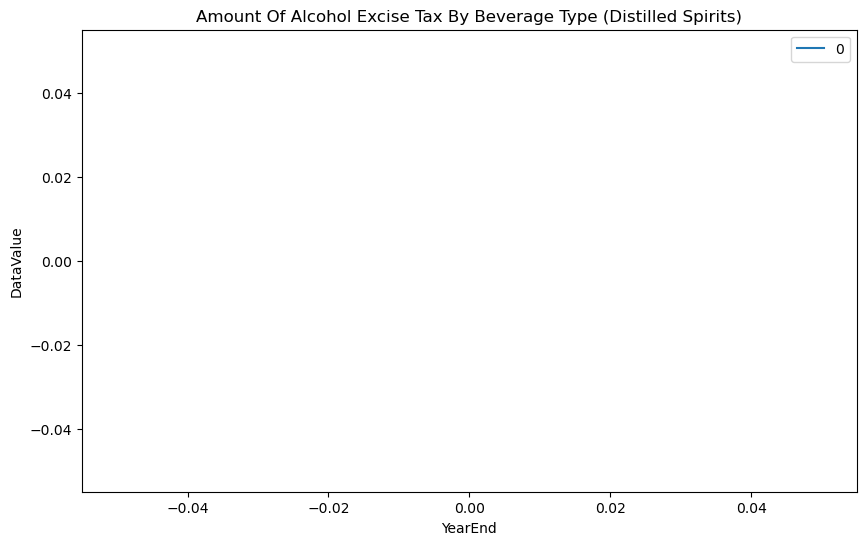

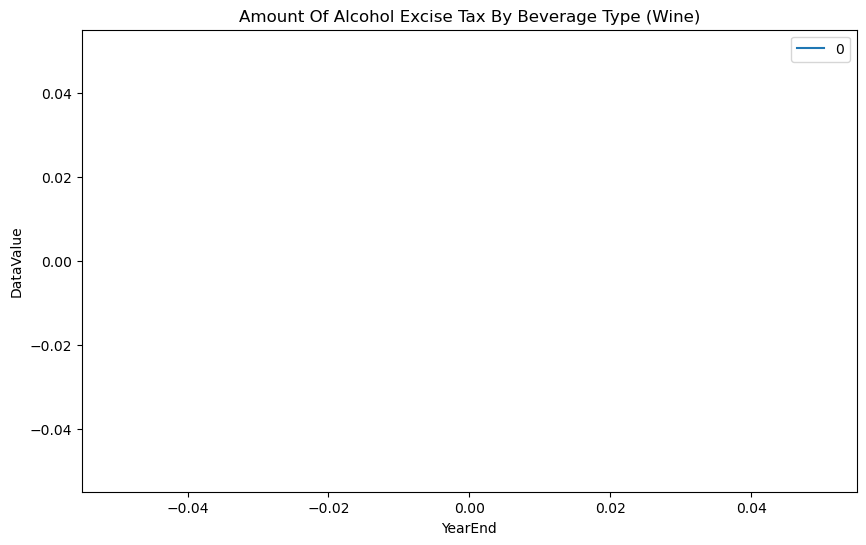

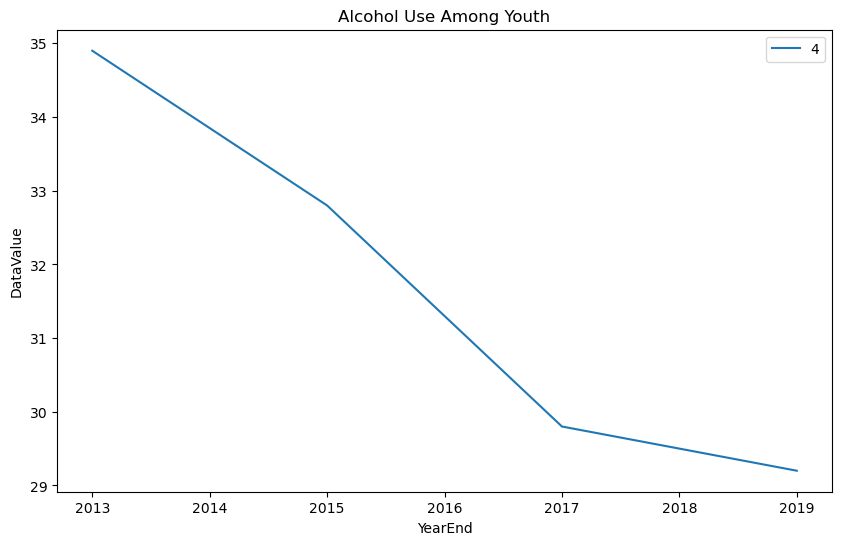

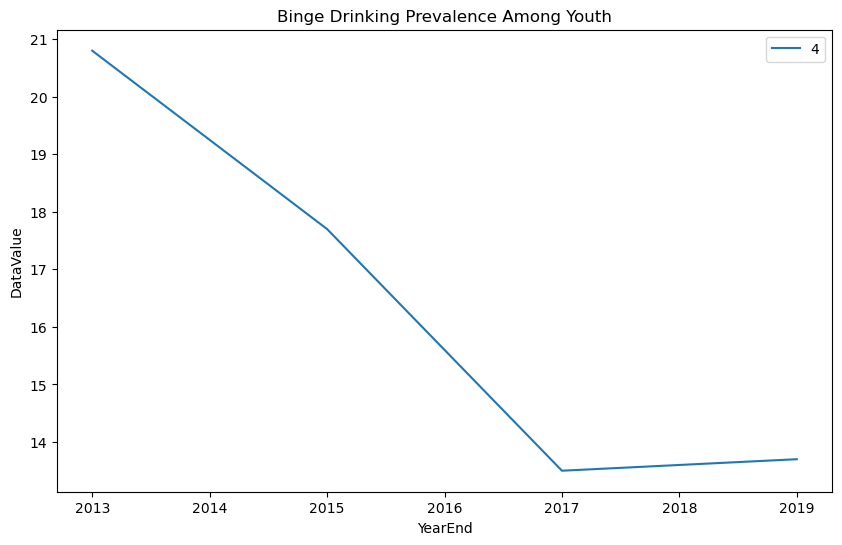

In [46]:
#loops through the dfs dictionary to extract the individual dfs by their 'Question' name and then plot them by yearend and datavalue
for df_name, df in dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['YearEnd'], df['DataValue'], label=df['DataValueUnit'].count())
    plt.xlabel('YearEnd')
    plt.ylabel('DataValue')
    plt.title(df_name.replace('_', ' ').title())
    plt.legend()
    plt.show()

Results: 'Percent tobacco revenue to fund at CDC recommended level' & 'Sale of cigarette packs' & 'Secondary schools that have a comprehensive tobacco-free school policy in place' dataframes don't have US or possibly Overall data causing them to be empty

dataframes with similar datavalue units that we could possibly plot on one graph:
    us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
    us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
#The top two have ranges 14 to 22 and the bottom has 15 to 21 could possibly combine these
    us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']

#range 4 to 9
    us_overall_smokeless_youth_df=dfs['Current smokeless tobacco use among youth']
#range 6 to 16
    us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']

#range 52 to 66
    us_overall_quit_tobacco_df = dfs['Quit attempts in the past year among current smokers']
#range 60 to 68
    us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
#range 50 to 62
    us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']




In [ ]:
#renaming all the dataframes in the dfs{} and storing them in their respective dataframes
us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']
us_overall_quit_alcohol_df = dfs['Quit attempts in the past year among current smokers']
us_overall_pneumococcal_vaccination_adult_age18_64_smokers_df =dfs['Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke']
us_overall_smokeless_alcohol_adult_df = dfs['Current smokeless alcohol use among adults aged >= 18 years']
us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']
us_overall_smokeless_youth_df=dfs['Current smokeless alcohol use among youth']
us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']
us_overall_sale_cigarette_packs=dfs['Sale of cigarette packs']
us_overall_2nd_school_alcohol_free_policy=dfs['Secondary schools that have a comprehensive alcohol-free school policy in place']
us_overall_alcohol_revenue_fund_cdc_level = dfs['Percent alcohol revenue to fund at CDC recommended level']

In [49]:
#filter these by location and possibly Overall and maybe we could make a bar graph?

overall_Chronic_liver_disease_mortality_df=grouped_alcohol_df.loc[grouped_alcohol_df['Question']=='Chronic_liver_disease_mortality'].loc[grouped_alcohol_df['StratificationCategory1'] == 'Overall']

# overall_sale_cigarette_packs_df=grouped_alcohol_df.loc[grouped_alcohol_df['Question'] == 'Sale of cigarette packs']\
# .loc[grouped_alcohol_df['StratificationCategory1'] == 'Overall']

# overall_2nd_school_alcohol_free_policy_df = grouped_alcohol_df.loc[grouped_alcohol_df['Question'] == 'Secondary schools that have a comprehensive alcohol-free school policy in place']\
# .loc[grouped_alcohol_df['StratificationCategory1'] == 'Overall']

# overall_alcohol_revenue_fund_cdc_level_df =grouped_alcohol_df.loc[grouped_alcohol_df['Question'] == 'Percent alcohol revenue to fund at CDC recommended level']\
# .loc[grouped_alcohol_df['StratificationCategory1'] == 'Overall'] 

#overall_sale_cigarette_packs_df
#overall_2nd_school_alcohol_free_policy_df
#overall_alcohol_revenue_fund_cdc_level_df

overall_Chronic_liver_disease_mortality_df

# overall_sale_cigarette_packs_df.plot(kind ='bar', x = 'YearEnd', y = "DataValue", label = 'Sale of Cigarette Packs')
# overall_2nd_school_alcohol_free_policy_df.plot(kind ='bar',x = 'YearEnd', y = "DataValue", label = 'Secondary schools that have a comprehensive alcohol-free school policy in place')
# overall_alcohol_revenue_fund_cdc_level_df.plot(kind ='bar', x = 'YearEnd', y = "DataValue", label = 'Percent alcohol revenue to fund at CDC recommended level')

#plt.legend()
#plt.figure(figsize=(20,10))

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1


In [41]:
#lets choose a question with an easy to understand and compareble data value with the location being the US and the stratification being overall
# ill start by looking at questions and datavaluess
us_overall_smokingb4pregnancy_df =grouped_alcohol_df.loc[grouped_alcohol_df['Question'] == 'Cigarette smoking before pregnancy'].loc[grouped_alcohol_df['LocationAbbr'] == 'US']\
.loc[grouped_alcohol_df['StratificationCategory1'] == 'Overall']

us_overall_quit_alcohol_df =grouped_alcohol_df.loc[grouped_alcohol_df['Question'] == 'Quit attempts in the past year among current smokers'].loc[grouped_alcohol_df['LocationAbbr'] == 'US']\
.loc[grouped_alcohol_df['StratificationCategory1'] == 'Overall']
#us_overall_smokingb4pregnancy_df
#us_overall_quit_alcohol_df.info()
#us_overall_quit_alcohol_df[['DataValue', 'DataValueUnit', 'DataValueType']]

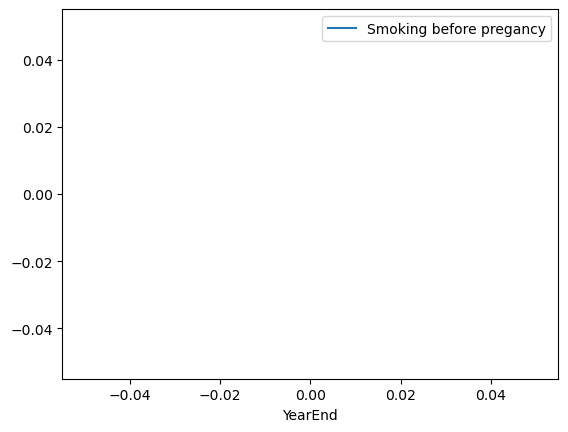

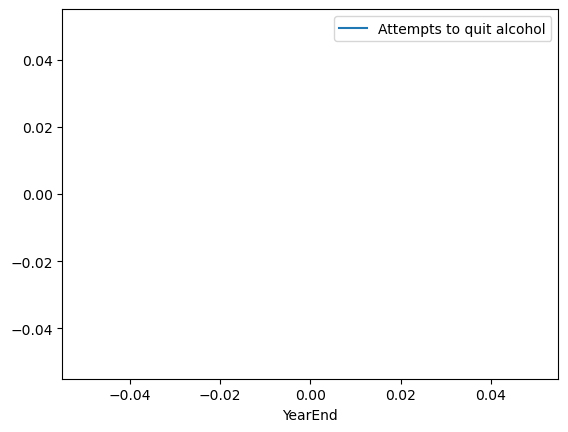

In [42]:
us_overall_smokingb4pregnancy_df.plot(x = 'YearEnd', y = "DataValue", label = 'Smoking before pregancy')
us_overall_quit_alcohol_df.plot(x = 'YearEnd', y = "DataValue", label = 'Attempts to quit alcohol')
plt.legend()

# plt.plot(us_overall_quit_alcohol_df['YearEnd'], us_overall_quit_alcohol_df['DataValue'], label = "Attempts to quit alcohol")
# plt.plot(us_overall_smokingb4pregnancy_df["YearEnd"], us_overall_smokingb4pregnancy_df['DataValue'], label = 'Smoking before pregancy')
# plt.legend()


# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
# plt.xlabel('Year')
# plt.ylabel('Question')
# plt.title('alcohol')
# plt.legend()

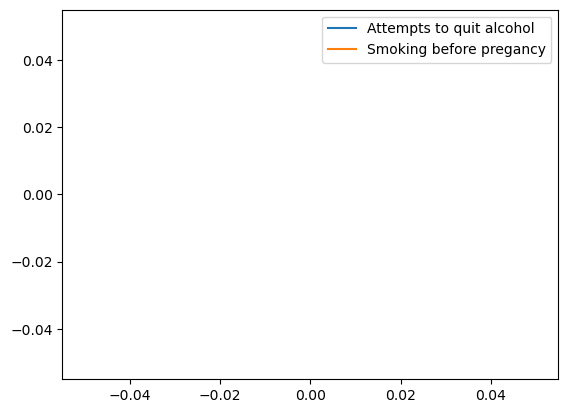

In [43]:
plt.plot(us_overall_quit_alcohol_df['YearEnd'], us_overall_quit_alcohol_df['DataValue'], label = "Attempts to quit alcohol")
plt.plot(us_overall_smokingb4pregnancy_df["YearEnd"], us_overall_smokingb4pregnancy_df['DataValue'], label = 'Smoking before pregancy')
plt.legend()


# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
# plt.xlabel('Year')
# plt.ylabel('Question')
# plt.title('alcohol')
# plt.legend()

In [44]:
alcohol_df['Question'].value_counts()

Question
Chronic liver disease mortality                                           9090
Binge drinking prevalence among adults aged >= 18 years                   8084
Heavy drinking among adults aged >= 18 years                              6176
Binge drinking frequency among adults aged >= 18 years who binge drink    6128
Binge drinking intensity among adults aged >= 18 years who binge drink    6049
Binge drinking prevalence among women aged 18-44 years                    1814
Alcohol use before pregnancy                                              1602
Heavy drinking among women aged 18-44 years                               1299
Alcohol use among youth                                                   1061
Binge drinking prevalence among youth                                      616
Per capita alcohol consumption among persons aged >= 14 years              312
Amount of alcohol excise tax by beverage type (beer)                       300
Amount of alcohol excise tax by beverage ty

In [53]:
question_year_df =grouped_alcohol_df.loc[grouped_alcohol_df['Question'].isin(['Binge drinking frequency among adults aged >= 18 years who binge drink',
'Binge drinking intensity among adults aged >= 18 years who binge drink'])].loc[grouped_alcohol_df['LocationAbbr'] == 'US']\
.loc[grouped_alcohol_df['StratificationCategory1'] == 'Overall']

# Create new columns based on the values in the 'Initial_Column'
question_year_df['Question1'] = np.where(question_year_df['Question'] =='Binge drinking frequency among adults aged >= 18 years who binge drink',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df['Question2'] = np.where(question_year_df['Question'] =='Binge drinking intensity among adults aged >= 18 years who binge drink',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df.head()

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Question1,Question2
1175,2011,2011,US,Alcohol,Binge drinking frequency among adults aged >= ...,4.4,Number,Age-adjusted Mean,50 States + DC: US Median,4.1,4.5,Overall,Overall,4.4,NaN
1176,2011,2011,US,Alcohol,Binge drinking frequency among adults aged >= ...,4.2,Number,Mean,50 States + DC: US Median,4.0,4.3,Overall,Overall,4.2,NaN
1734,2011,2011,US,Alcohol,Binge drinking intensity among adults aged >= ...,7.3,Number,Age-adjusted Mean,50 States + DC: US Median,7.1,7.4,Overall,Overall,NaN,7.3
1735,2011,2011,US,Alcohol,Binge drinking intensity among adults aged >= ...,7.8,Number,Mean,50 States + DC: US Median,7.6,7.9,Overall,Overall,NaN,7.8
4929,2012,2012,US,Alcohol,Binge drinking frequency among adults aged >= ...,4.3,Number,Mean,50 States + DC: US Median,4.1,4.4,Overall,Overall,4.3,NaN


In [50]:
#we first filtered the dataframe to only include 2 questions as well as location = US, stratification = Overall


question_year_df =grouped_alcohol_df.loc[grouped_alcohol_df['Question'].isin(['Current smoking among adults aged >= 18 years', 'Current smokeless alcohol use among adults aged >= 18 years'])].loc[grouped_alcohol_df['LocationAbbr'] == 'US']\
# .loc[grouped_alcohol_df['StratificationCategory1'] == 'Overall']

# #put each question into its own list
# # Create new columns based on the values in the 'Initial_Column'
# question_year_df['Question1'] = np.where(question_year_df['Question'] =='Current smoking among adults aged >= 18 years',
#                                          question_year_df['DataValue'],
#                                          np.nan)
# question_year_df['Question2'] = np.where(question_year_df['Question'] =='Current smokeless alcohol use among adults aged >= 18 years',
#                                          question_year_df['DataValue'],
#                                          np.nan)
# question_year_df.head()

# 

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Question1,Question2


In [54]:
question_year_df.columns


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question',
       'DataValue', 'DataValueUnit', 'DataValueType', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Question1', 'Question2'],
      dtype='object')

In [55]:
question_year_filter = question_year_df[['YearEnd','Question1','Question2']]
#question_year_filter.set_index("YearEnd")
question_year_filter.head()

,YearEnd,Question1,Question2
1175,2011,4.4,NaN
1176,2011,4.2,NaN
1734,2011,NaN,7.3
1735,2011,NaN,7.8
4929,2012,4.3,NaN


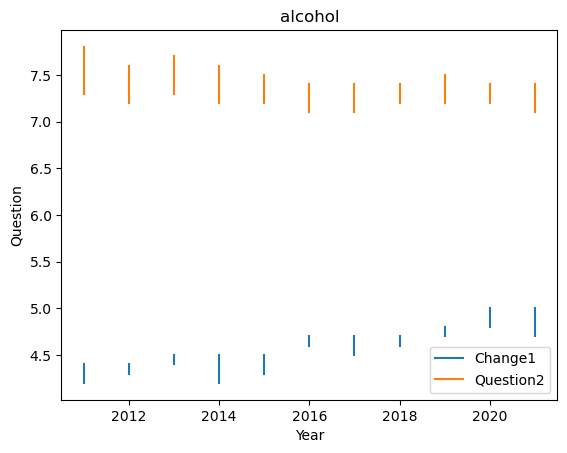

In [57]:
#ploting 2 question on the same graph with YearEnd as the x axis
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Binge drinking frequency among adults')
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Binge drinking intensity among adults')
plt.xlabel('Year')
plt.ylabel('Data Value')
plt.title('alcohol')
plt.legend()

C:\Users\Adeniyi Lawal\AppData\Local\Temp\ipykernel_101688\3781648246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)


<Axes: >

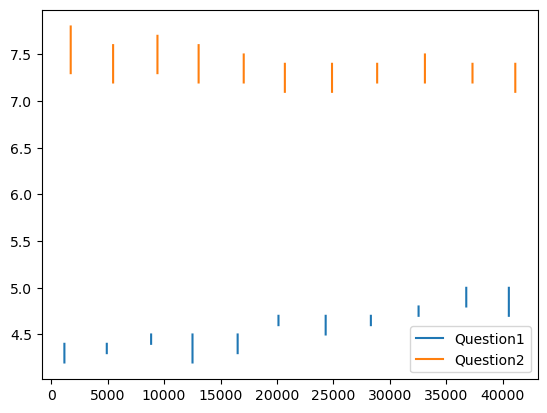

In [58]:
#df['column_name'] = df['column_name'].astype(int)
question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)

question_year_filter[['Question1', 'Question2']].plot()



#question_year_filter.plot(y = 'Question1', 'Question2')


In [61]:
us_overall_df =grouped_alcohol_df.loc[grouped_alcohol_df['Question'].isin(['Binge drinking frequency among adults aged >= 18 years who binge drink',
'Binge drinking intensity among adults aged >= 18 years who binge drink'])].loc[grouped_alcohol_df['LocationAbbr'] == 'US']\
.loc[grouped_alcohol_df['StratificationCategory1'] == 'Overall']

us_overall_df.tail()


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
37317,2020,2020,US,Alcohol,Binge drinking intensity among adults aged >= ...,7.2,Number,Age-adjusted Mean,50 States + DC: US Median,6.8,7.3,Overall,Overall
40535,2021,2021,US,Alcohol,Binge drinking frequency among adults aged >= ...,4.7,Number,Mean,US estimate/number is based on fewer than 50 s...,4.5,5.0,Overall,Overall
40536,2021,2021,US,Alcohol,Binge drinking frequency among adults aged >= ...,5.0,Number,Age-adjusted Mean,US estimate/number is based on fewer than 50 s...,4.7,5.1,Overall,Overall
41106,2021,2021,US,Alcohol,Binge drinking intensity among adults aged >= ...,7.4,Number,Mean,US estimate/number is based on fewer than 50 s...,7.1,7.5,Overall,Overall
41107,2021,2021,US,Alcohol,Binge drinking intensity among adults aged >= ...,7.1,Number,Age-adjusted Mean,US estimate/number is based on fewer than 50 s...,6.9,7.2,Overall,Overall


<Axes: title={'center': 'Question'}, xlabel='YearEnd', ylabel='DataValue'>

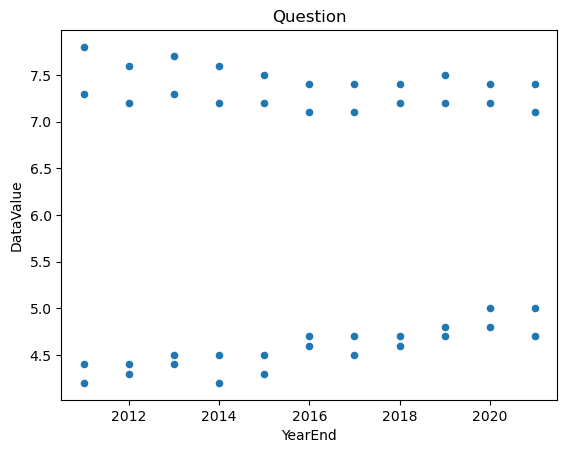

In [62]:
us_overall_df.plot(kind = 'scatter', x='YearEnd', y= 'DataValue', title ='Question' )